# ObsPy in Jupyter's "Anaconda Python" Kernel on SageMathCloud

http://docs.obspy.org/ -- A Python Toolbox for seismology/seismological observatories.

In [1]:
import sys
sys.executable

'/ext/anaconda3/bin/python3'

In [2]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

t1 = UTCDateTime("2010-09-3T16:30:00.000")
t2 = UTCDateTime("2010-09-3T17:00:00.000")
fdsn_client = Client('IRIS')
# Fetch waveform from IRIS FDSN web service into a ObsPy stream object
# and automatically attach correct response
st = fdsn_client.get_waveforms(network='NZ', station='BFZ', location='10',
                               channel='HHZ', starttime=t1, endtime=t2,
                               attach_response=True)
# define a filter band to prevent amplifying noise during the deconvolution
pre_filt = (0.005, 0.006, 30.0, 35.0)
st.remove_response(output='DISP', pre_filt=pre_filt)

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2010-09-03T16:30:00.008393Z - 2010-09-03T16:59:59.998393Z | 100.0 Hz, 180000 samples

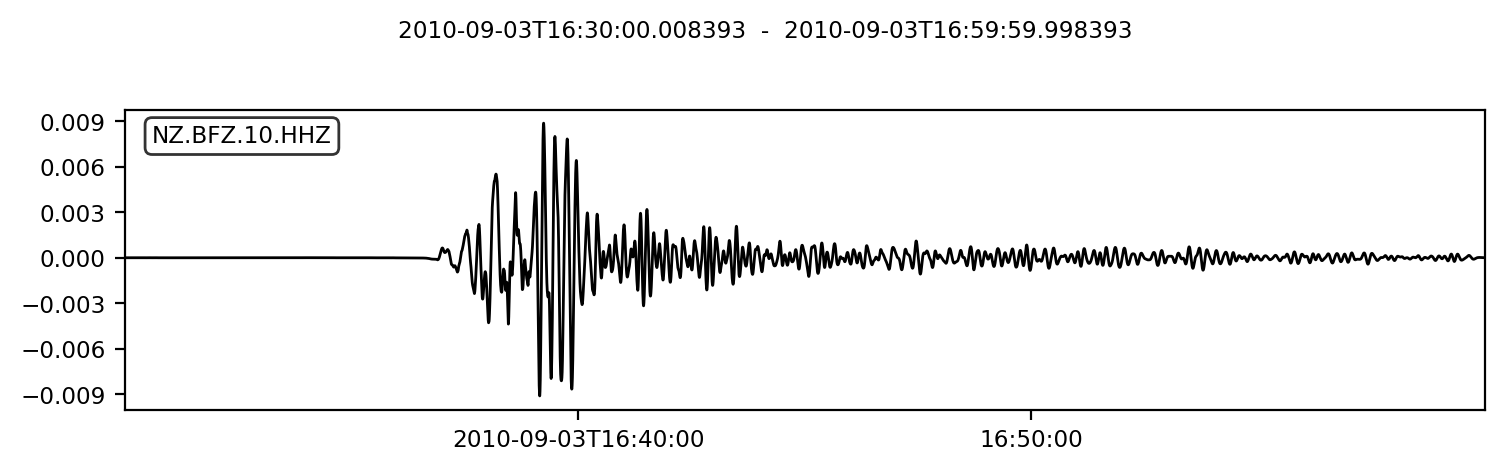

In [3]:
st.plot()

In [5]:
import tensorflow as tf
tf.__version__

'1.4.0'